In [1]:
import matplotlib.pyplot as plt
import matplotlib as mpl
import numpy as np
import pandas as pd
import seaborn as sns

## bulkRNA ERCC1 KO in human iPSC cells (with controls - WT cultured cells)
### Data has triplicates (3 samples) for three time points (0, W2, W4)

In [3]:
# open specific sheets
df_K0W0 = pd.read_excel('/Users/Akanksha/JugnuLab/data_analysis/datasets/bulk_RNA_iPSC/Kritika Sheet_Data and analysis.xlsx', sheet_name='K0W0')
df_K2W2 = pd.read_excel('/Users/Akanksha/JugnuLab/data_analysis/datasets/bulk_RNA_iPSC/Kritika Sheet_Data and analysis.xlsx', sheet_name='K2W2')
#rename column of K2W2
df_K2W2 = df_K2W2.rename(columns={'Adjusted P value': 'Adjustedpvalue'})
df_K4W4 = pd.read_excel('/Users/Akanksha/JugnuLab/data_analysis/datasets/bulk_RNA_iPSC/Kritika Sheet_Data and analysis.xlsx', sheet_name='K4W4')

In [6]:
# Function to convert column to numeric, coerce errors to NaN
def convert_to_numeric(df, column):
    df[column] = pd.to_numeric(df[column], errors='coerce')
    return df

# Convert 'Adjustedpvalue' column to numeric
df_K0W0 = convert_to_numeric(df_K0W0, 'Adjustedpvalue')
df_K2W2 = convert_to_numeric(df_K2W2, 'Adjustedpvalue')
df_K4W4 = convert_to_numeric(df_K4W4, 'Adjustedpvalue')

# drop rows with negative Adjustedpvalue
df_K0W0 = df_K0W0[df_K0W0['Adjustedpvalue'] >= 0]
df_K2W2 = df_K2W2[df_K2W2['Adjustedpvalue'] >= 0]
df_K4W4 = df_K4W4[df_K4W4['Adjustedpvalue'] >= 0]

# Sort the DataFrames by 'Adjustedpvalue'
df_K0W0 = df_K0W0.sort_values(by='Adjustedpvalue')
df_K2W2 = df_K2W2.sort_values(by='Adjustedpvalue')
df_K4W4 = df_K4W4.sort_values(by='Adjustedpvalue')


In [7]:
df_K2W2.head(1000) # -ve adjusted p-values, adjusted p-values get lower than p-values, column name was different from K0W0 and K4W4, column has some strings.

,Unnamed: 0,logFC,logCPM,F,PValue,Adjustedpvalue,gene_ID
44576,NaN,-1.219255e-01,-1.612197,0.041483,8.391492e-01,1.573828e-58,HSPA2-AS1
6175,NaN,-8.945721e+00,7.214590,3384.057144,1.810895e-62,1.573828e-57,RPS4Y1
47543,NaN,-5.125482e-15,-3.473269,0.000000,1.000000e+00,6.648692e-42,ENSG00000264643
38979,NaN,8.828221e-01,7.193611,126.016012,1.584384e-17,2.175892e-41,SELENOP
9142,NaN,4.457369e+00,6.446241,374.619916,1.416134e-10,6.648692e-41,SLC5A12
...,...,...,...,...,...,...,...
9420,NaN,9.339422e-01,5.477737,94.187423,1.339354e-13,4.201616e-12,NR3C2
4104,NaN,-2.222934e+00,2.742718,40.721461,2.228187e-05,4.294197e-12,LAMA4
42638,NaN,-5.125482e-15,-3.473269,0.000000,1.000000e+00,4.416431e-12,ENSG00000255525
5124,NaN,-8.062043e-01,7.900311,53.066003,6.738210e-07,4.539111e-12,RDH10


In [8]:
# open specific sheets in the priority gene lists file
df_FAO = pd.read_excel('/Users/Akanksha/JugnuLab/data_analysis/datasets/bulk_RNA_iPSC/Heatmap_priority_genes.xlsx', sheet_name='FAO & Krebs cycle')
df_glycolysis = pd.read_excel('/Users/Akanksha/JugnuLab/data_analysis/datasets/bulk_RNA_iPSC/Heatmap_priority_genes.xlsx', sheet_name='Glycolysis')
df_cellcycle = pd.read_excel('/Users/Akanksha/JugnuLab/data_analysis/datasets/bulk_RNA_iPSC/Heatmap_priority_genes.xlsx', sheet_name='Cell cycle')
df_maturation = pd.read_excel('/Users/Akanksha/JugnuLab/data_analysis/datasets/bulk_RNA_iPSC/Heatmap_priority_genes.xlsx', sheet_name='Maturation')

In [9]:
# extract the gene names from the priority gene lists and store as list of strings
FAO_genes = df_FAO['Genes'].tolist()
glycolysis_genes = df_glycolysis['Genes'].tolist()
cellcycle_genes = df_cellcycle['Genes'].tolist()
maturation_genes = df_maturation['Genes'].tolist()

# convert the gene names to uppercase and remove any trailing whitespaces
FAO_genes = [gene.upper().strip() for gene in FAO_genes]
glycolysis_genes = [gene.upper().strip() for gene in glycolysis_genes]
cellcycle_genes = [gene.upper().strip() for gene in cellcycle_genes]
maturation_genes = [gene.upper().strip() for gene in maturation_genes]

# replace with updated names 
FAO_genes = ['ACADM', 'ACADVL', 'CPT1A', 'CPT1B', 'CD36', 'FABP3', 'ECH1', 'ACO2', 'LDHA', 'OGDH', 'SDHA', 'SDHB', 'SDHC', 'SDHD', 'MDH1', 'MDH2', 'FHP1', 'CS', 'ACADSB']
glycolysis_genes = ['HK1', 'HK2', 'PFKM', 'ALDOC', 'GAPDH', 'ENO2', 'SLC2A1', 'SLC2A4', 'PGM1', 'PGK 1']
cellcycle_genes = ['CCNA2', 'CCNB1', 'CCNB2', 'CCND1', 'CCND2', 'CCNE1', 'CCNE2', 'CDK1', 'CDK4', 'CDK6', 'MCM2', 'CCND3', 'CDK2', 'CSNK2A1']
maturation_genes = ['MYH7', 'MYH6', 'TNNT2', 'TNNI3', 'TPM1', 'ACTC1', 'MYL2', 'MYL3', 'MYL7', 'MYL4', 'MYLK2', 'NPPA', 'NPPB', 'PLN', 'RYR2', 'KCNH2', 'SCN5A', 'KCNQ1', 'ATP2A2']

print(FAO_genes); print(glycolysis_genes); print(cellcycle_genes); print(maturation_genes)

['ACADM', 'ACADVL', 'CPT1A', 'CPT1B', 'CD36', 'FABP3', 'ECH1', 'ACO2', 'LDHA', 'OGDH', 'SDHA', 'SDHB', 'SDHC', 'SDHD', 'MDH1', 'MDH2', 'FHP1', 'CS', 'ACADSB']
['HK1', 'HK2', 'PFKM', 'ALDOC', 'GAPDH', 'ENO2', 'SLC2A1', 'SLC2A4', 'PGM1', 'PGK 1']
['CCNA2', 'CCNB1', 'CCNB2', 'CCND1', 'CCND2', 'CCNE1', 'CCNE2', 'CDK1', 'CDK4', 'CDK6', 'MCM2', 'CCND3', 'CDK2', 'CSNK2A1']
['MYH7', 'MYH6', 'TNNT2', 'TNNI3', 'TPM1', 'ACTC1', 'MYL2', 'MYL3', 'MYL7', 'MYL4', 'MYLK2', 'NPPA', 'NPPB', 'PLN', 'RYR2', 'KCNH2', 'SCN5A', 'KCNQ1', 'ATP2A2']


#### FAO genes search in DEGs

In [10]:
# search for FAO genes in the K0W0, K2W2 and K4W4 dataframes
FAO_K0W0 = df_K0W0[df_K0W0['gene_ID'].isin(FAO_genes)]
FAO_K2W2 = df_K2W2[df_K2W2['gene_ID'].isin(FAO_genes)]
FAO_K4W4 = df_K4W4[df_K4W4['gene_ID'].isin(FAO_genes)]
# print the number of genes found in the K0W0 dataframe
print(len(FAO_genes), len(FAO_K0W0))
print(len(FAO_genes), len(FAO_K2W2))
print(len(FAO_genes), len(FAO_K4W4))
# store the genes not found in a list
FAO_K0W0_notfound = [gene for gene in FAO_genes if gene not in FAO_K0W0['gene_ID'].tolist()]
print(FAO_K0W0_notfound)

19 19
19 19
19 19
[]


#### Glycolysis genes search in DEGs

In [11]:
# search for glycolysis genes in the K0W0, K2W2 and K4W4 dataframes
glycolysis_K0W0 = df_K0W0[df_K0W0['gene_ID'].isin(glycolysis_genes)]
glycolysis_K2W2 = df_K2W2[df_K2W2['gene_ID'].isin(glycolysis_genes)]
glycolysis_K4W4 = df_K4W4[df_K4W4['gene_ID'].isin(glycolysis_genes)]
# print the number of genes found in the K0W0 dataframe
print(len(glycolysis_genes), len(glycolysis_K0W0))
print(len(glycolysis_genes), len(glycolysis_K2W2))
print(len(glycolysis_genes), len(glycolysis_K4W4))
# store the genes not found in a list
glycolysis_K0W0_notfound = [gene for gene in glycolysis_genes if gene not in glycolysis_K0W0['gene_ID'].tolist()]
print(glycolysis_K0W0_notfound)

# ADD PGK1 to glycolysis_K0W0, glycolysis_K2W2, glycolysis_K4W4
pgk1_K0W0 = []
pgk1_K2W2 = []
pgk1_K4W4 = []

10 10
10 10
10 10
[]


#### Cell-cycle genes search in DEGs

In [12]:
# search for cellcycle genes in the K0W0, K2W2 and K4W4 dataframes
cellcycle_K0W0 = df_K0W0[df_K0W0['gene_ID'].isin(cellcycle_genes)]
cellcycle_K2W2 = df_K2W2[df_K2W2['gene_ID'].isin(cellcycle_genes)]
cellcycle_K4W4 = df_K4W4[df_K4W4['gene_ID'].isin(cellcycle_genes)]
# print the number of genes found in the K0W0 dataframe
print(len(cellcycle_genes), len(cellcycle_K0W0))
print(len(cellcycle_genes), len(cellcycle_K2W2))
print(len(cellcycle_genes), len(cellcycle_K4W4))
# store the genes not found in a list
cellcycle_K0W0_notfound = [gene for gene in cellcycle_genes if gene not in cellcycle_K0W0['gene_ID'].tolist()]
print(cellcycle_K0W0_notfound)

14 14
14 14
14 14
[]


#### Maturation genes search in DEGs

In [13]:
# search for maturation genes in the K0W0, K2W2 and K4W4 dataframes
maturation_K0W0 = df_K0W0[df_K0W0['gene_ID'].isin(maturation_genes)]
maturation_K2W2 = df_K2W2[df_K2W2['gene_ID'].isin(maturation_genes)]
maturation_K4W4 = df_K4W4[df_K4W4['gene_ID'].isin(maturation_genes)]
# print the number of genes found in the K0W0 dataframe
print(len(maturation_genes), len(maturation_K0W0))
print(len(maturation_genes), len(maturation_K2W2))
print(len(maturation_genes), len(maturation_K4W4))
# store the genes not found in a list
maturation_K0W0_notfound = [gene for gene in maturation_genes if gene not in maturation_K0W0['gene_ID'].tolist()]
print(maturation_K0W0_notfound)

19 19
19 19
19 19
[]


#### Plot longitudinal heatmaps

In [14]:
# Function to prepare the data with upregulated and downregulated columns
def prepare_data(df, timepoint):
    df['upregulated'] = df['logFC'].apply(lambda x: x if x > 0 else 0)
    df['downregulated'] = df['logFC'].apply(lambda x: x if x < 0 else 0)
    df['upregulated_pvalue'] = df.apply(lambda row: row['Adjustedpvalue'] if row['logFC'] > 0 else np.nan, axis=1)
    df['downregulated_pvalue'] = df.apply(lambda row: row['Adjustedpvalue'] if row['logFC'] < 0 else np.nan, axis=1)
    df_up = df[['gene_ID', 'upregulated', 'upregulated_pvalue']].rename(columns={'upregulated': f'{timepoint}_up', 'upregulated_pvalue': f'{timepoint}_up_pvalue'})
    df_down = df[['gene_ID', 'downregulated', 'downregulated_pvalue']].rename(columns={'downregulated': f'{timepoint}_down', 'downregulated_pvalue': f'{timepoint}_down_pvalue'})
    return df_up, df_down

In [15]:
# Prepare data for each timepoint
k0w0_up, k0w0_down = prepare_data(glycolysis_K0W0, 'K0W0')
k2w2_up, k2w2_down = prepare_data(glycolysis_K2W2, 'K2W2')
k4w4_up, k4w4_down = prepare_data(glycolysis_K4W4, 'K4W4')

# Merge data into a single DataFrame for fold change
merged_df = pd.merge(k0w0_up[['gene_ID', 'K0W0_up']], k0w0_down[['gene_ID', 'K0W0_down']], on='gene_ID')
merged_df = pd.merge(merged_df, k2w2_up[['gene_ID', 'K2W2_up']], on='gene_ID')
merged_df = pd.merge(merged_df, k2w2_down[['gene_ID', 'K2W2_down']], on='gene_ID')
merged_df = pd.merge(merged_df, k4w4_up[['gene_ID', 'K4W4_up']], on='gene_ID')
merged_df = pd.merge(merged_df, k4w4_down[['gene_ID', 'K4W4_down']], on='gene_ID')

# Set gene_ID as the index
merged_df.set_index('gene_ID', inplace=True)

# Merge data into a single DataFrame for p-values
merged_df_p = pd.merge(k0w0_up[['gene_ID', 'K0W0_up_pvalue']], k0w0_down[['gene_ID', 'K0W0_down_pvalue']], on='gene_ID')
merged_df_p = pd.merge(merged_df_p, k2w2_up[['gene_ID', 'K2W2_up_pvalue']], on='gene_ID')
merged_df_p = pd.merge(merged_df_p, k2w2_down[['gene_ID', 'K2W2_down_pvalue']], on='gene_ID')
merged_df_p = pd.merge(merged_df_p, k4w4_up[['gene_ID', 'K4W4_up_pvalue']], on='gene_ID')
merged_df_p = pd.merge(merged_df_p, k4w4_down[['gene_ID', 'K4W4_down_pvalue']], on='gene_ID')

# Set gene_ID as the index
merged_df_p.set_index('gene_ID', inplace=True)

# Find significant points
significant_points = np.where(merged_df_p.values < 0.05)

/var/folders/tb/s68l7gcj6rg4952d2x7x3jd80000gn/T/ipykernel_11364/799194376.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['upregulated'] = df['logFC'].apply(lambda x: x if x > 0 else 0)
/var/folders/tb/s68l7gcj6rg4952d2x7x3jd80000gn/T/ipykernel_11364/799194376.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['downregulated'] = df['logFC'].apply(lambda x: x if x < 0 else 0)
/var/folders/tb/s68l7gcj6rg4952d2x7x3jd80000gn/T/ipykernel_11364/799194376.py:5: SettingWithCopyWarning: 
A value is tryin

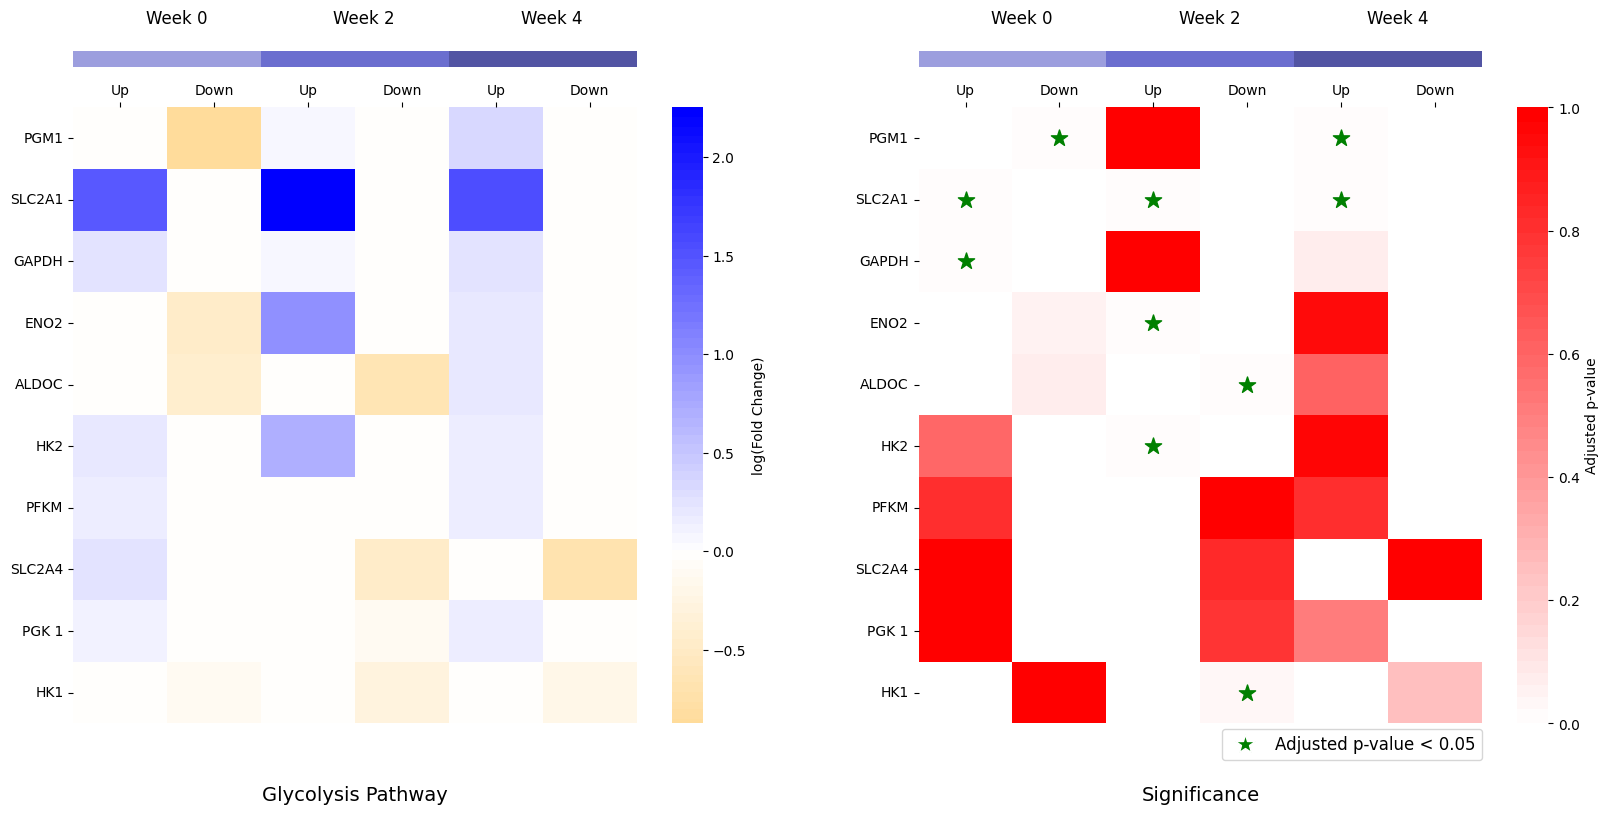

In [16]:

################################################### Plotting code ###################################################
# Define the new labels for the x-axis
new_labels = ['Up', 'Down', 'Up', 'Down', 'Up', 'Down']
# Define the positions for the week labels
week_labels_positions = [(0.1, 2.1, 'Week 0'), (2.1, 4.1, 'Week 2'), (4.1, 6.1, 'Week 4')]

# Create a custom colormap for fold change values
colors_list = ['orange', 'white', 'blue']
n_bins = 100  # Discretizes the interpolation into bins
cmap_name = 'custom_blue_orange'
custom_cmap = mpl.colors.LinearSegmentedColormap.from_list(cmap_name, colors_list, N=n_bins)

# Create a custom colormap for p-values
colors_list_p = ['lightgreen', 'white', 'red']
cmap_name_p = 'custom_red_green'
custom_cmap_p = mpl.colors.LinearSegmentedColormap.from_list(cmap_name_p, colors_list_p, N=n_bins)

# Plot the heatmaps
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(20, 8))

# Fold change heatmap
ax1 = sns.heatmap(merged_df, cmap=custom_cmap, center=0, cbar_kws={'label': 'log(Fold Change)'}, ax=axes[0])
ax1.set_xlabel('Glycolysis Pathway', fontsize=14)
ax1.xaxis.tick_top()
ax1.set_ylabel('')
ax1.set_yticklabels(ax1.get_yticklabels(), rotation=0)
ax1.set_xticklabels(new_labels)

# P-value heatmap
ax2 = sns.heatmap(merged_df_p, cmap=custom_cmap_p, center=0, cbar_kws={'label': 'Adjusted p-value'}, ax=axes[1])
ax2.set_xlabel('Significance', fontsize=14)
ax2.xaxis.tick_top()
ax2.set_ylabel('')
ax2.set_yticklabels(ax2.get_yticklabels(), rotation=0)
ax2.set_xticklabels(new_labels)

# Add rectangular, spaced, and very thin colored bars at the top
bar_y_position = ax1.get_position().y1 + 0.05
label_y_position = bar_y_position + 0.05
bar_height = 0.02
number_of_columns_in_heatmap = 6

# Get colors from the tab20c colormap for the bars
colors_for_bars = [plt.get_cmap('tab20b')(i) for i in range(0,4)]
colors_for_bars.reverse()

# Add bars
for idx, (start, end) in enumerate([(0, 2), (2, 4), (4, 6)]):
    fig.patches.extend([mpl.patches.Rectangle(
        (axes[0].get_position().x0 + start / number_of_columns_in_heatmap * (axes[0].get_position().width), bar_y_position),
        (end-start) / number_of_columns_in_heatmap * (axes[0].get_position().width), bar_height,
        linewidth=1, edgecolor=None, facecolor=colors_for_bars[idx], transform=fig.transFigure, clip_on=False
    )])
    fig.patches.extend([mpl.patches.Rectangle(
        (axes[1].get_position().x0 + start / number_of_columns_in_heatmap * (axes[1].get_position().width), bar_y_position),
        (end-start) / number_of_columns_in_heatmap * (axes[1].get_position().width), bar_height,
        linewidth=1, edgecolor=None, facecolor=colors_for_bars[idx], transform=fig.transFigure, clip_on=False
    )])

# Add week labels on top for both heatmaps
for start, end, label in week_labels_positions:
    fig.text(
        (axes[0].get_position().x0 + axes[0].get_position().width * (start + end) / 2 / number_of_columns_in_heatmap), 
        label_y_position, label, ha='center', va='bottom', fontsize=12, transform=fig.transFigure
    )
    fig.text(
        (axes[1].get_position().x0 + axes[1].get_position().width * (start + end) / 2 / number_of_columns_in_heatmap), 
        label_y_position, label, ha='center', va='bottom', fontsize=12, transform=fig.transFigure
    )

# Adjust x-axis label position below the heatmap
ax1.xaxis.set_label_coords(0.5, -0.1, transform=ax1.transAxes)
ax2.xaxis.set_label_coords(0.5, -0.1, transform=ax2.transAxes)

# Plot stars for significant points
for y, x in zip(*significant_points):
    ax2.scatter(x + 0.5, y + 0.5, marker='*', color='green', s=150, zorder = 5)
# Create a custom legend for the star markers
star_patch = mpl.lines.Line2D([0], [0], marker='*', color='w', label='Adjusted p-value < 0.05', markerfacecolor='green', markersize=15)
# Add the legend to the significance plot
ax2.legend(handles=[star_patch], loc='lower right', fontsize=12, bbox_to_anchor=(1.0, -0.06), borderaxespad=0.)

plt.show()